<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/Lab01_Partial_Least_Squares_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪LAB: Partial Least Squares Regression

In this lab, you will explore **Partial Least Squares (PLS) Regression**, a powerful technique for modeling relationships between high-dimensional, collinear predictors and a continuous outcome. You will begin with a **group discussion** after reading about the method. Next, you will become familiar with its implementation in `scikit-learn` by **recreating and reflecting on one of their tutorials**. Finally, you will apply PLS to a **real-world chemoinformatics dataset** that includes binary molecular fingerprints as predictors and a continuous permeability outcome for a set of chemical compounds.

PLS is particularly useful when the number of predictors is large and highly correlated, making traditional regression methods unstable or ineffective. You will also compare PLS with an alternative predictive model that also involves a dimensionality reduction approac **Penalized Principal Component Regression (PCR)**.

---

**Collaboration Note**: This assignment is designed to support collaborative work. We encourage you to divide tasks among group members so that everyone can contribute meaningfully. Many components of the assignment can be approached in parallel or split logically across team members. Good coordination and thoughtful integration of your work will lead to a stronger final result.

---

In total, this lab assignment will be worth **100 points**.

## 1. Reading & Group Discussion (10 Points)

Carefully read **Sections 6.2 and 6.3** of the *An Introduction to Statistical Learning* book (Reference B). The first section introduces Principal Component Regression (PCR), which we already covered in a previous class. The second section, instead, introduces Partial Least Squares (PLS).

After reviewing the content, discuss with your group and then answer the following questions:

a. What is the key difference between Principal Component Regression (PCR) and Partial Least Squares (PLS)     


b. Why might PCR fail to find directions that are useful for predicting the response `Y`?

c. In PLS, how is the first direction `Z₁` computed?

d. What are some similarities and differences between PLS and penalized regression?

YOUR TEXT HERE

PCR is unsupervised while PLS is supervised.         
Because PCR is unsupervised, Y is not used to determine what the directions of the principal components are, so there is no way the principal components selected in the end are the best for predicting Y.         
It standardizes the data, then sets each weight equal to the coefficients for that variable found from the linear regression of Y onto Xj. In the end Z1 is a combination of the predictors weighted.          
The goal of penalized regression is to not overfit the data, while PLS is also trying to make sure the model is not fit on unnecessary dimensions. However, penalized regression does this by adding a penalty term while PLS does this by having weighted predictors that are significant in predicting Y.


## 2. Recreate, Explain, Experiment & Reflect (35 points)

Follow this tutorial on Partial Least Squares (PLS) from the official scikit-learn documentation:

📘 [scikit-learn: PLS regression example](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html)

Your goal is to **recreate the PLS portion of the tutorial in this notebook**, and make sure you understand what each part of the code is doing. This will give you the opportunity to build intuition for how PLS works. Be thorough in your answers and interpretations — this will help you when working with real data later in this lab assignment.

### a. Recreate
- Load the dataset used in the tutorial. Make sure to create a training/test partition.
- Fit a `PLSRegression` model with 1 component.

In [ ]:
# YOUR CODE HERE

import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
# Key imports – we need these libraries to access functions for data analysis and modeling.
# Imports are important because they give us pre-built tools instead of coding everything from scratch.


rng = np.random.RandomState(0)
#Goal: Create a random number generator with fixed seed of 0.
#Importance: Ensures reproducibility so the PLS pipeline gives consistent results each run.
#Output:ensures we have a consistent source of randomness for the rest of the analysis.

n_samples = 500
# Goal: Define the number of data points (observations) to generate for the analysis.
# Importance: Controls dataset size, which affects how well PLS can detect patterns and relationships.
# Output: Stores the integer value 500, representing the sample size for the dataset.

cov = [[3, 3], [3, 4]]
# Goal: Define the covariance matrix that sets how two variables are related in the simulated dataset.
# Importance: Controls the correlation structure between predictors, which is central for testing PLS since it handles correlated variables.
# Output: Stores a 2×2 matrix showing variances on the diagonal (3, 4) and covariance (3) off-diagonal, meaning the two variables are positively correlated.

X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
# Goal: Generate a dataset of n_samples (500) observations with two correlated variables, drawn from a multivariate normal distribution.
# Importance: Creates predictor variables (X) with realistic correlation, which is key for demonstrating how PLS handles multicollinearity.
# Output: A (500 × 2) NumPy array where each row is a sample and the two columns are correlated features based on the covariance matrix.

pca = PCA(n_components=2).fit(X)
# Goal: Fit a PCA model on X to reduce its dimensions while capturing as much variance as possible.
# Importance: Provides a baseline comparison to PLS by showing how PCA summarizes predictors without considering the response variable.
# Output: A trained PCA object storing information like principal components, explained variance, and loadings.

y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2
# Goal: Create a response variable y by projecting X onto the second principal component and adding some random noise.
# Importance: Simulates a target that is related to X but not perfectly, letting us test how well PLS can uncover the signal in noisy, correlated data.
# Output: A (500,) NumPy array of target values y, where each value is influenced by the second component of X plus noise.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
# Goal: Split the dataset into training and testing sets for model building and evaluation.
# Importance: Ensures we can train the PLS model on one portion of the data and test it on unseen data to check generalization.
# Output: Four arrays: X_train, X_test (predictors) and y_train, y_test (targets), with consistent splits due to the fixed random seed.

pls = PLSRegression(n_components=1)
# Goal: Initialize a Partial Least Squares regression model that will extract 1 component linking X and y.
# Importance: PLS finds new features that summarize X while being most predictive of y, which is especially useful with correlated predictors.
# Output: An unfitted PLSRegression object ready to be trained on the data.

pls.fit(X_train, y_train)
# Goal: Train (fit) the PLS model using the training data to learn the relationship between X and y.
# Importance: This step extracts the latent component(s) from X that are most predictive of y, building the actual regression model.
# Output: The PLS model is now fitted — it stores weights, loadings, and regression coefficients that can be used for predictions.

PLSRegression(n_components=1)

### b. Explain
For **every block of code**, add a markdown cell that explains:

- What is the goal of this step?
- Why is this important in a PLS regression pipeline?
- What does the output mean or tell us?

YOUR TEXT HERE

### c. Experiment
Make the following changes:
- Change the number of components to **2 components** and fit again the model.
- Plot the **predicted vs. actual** response values on the test set.
- Report **R²** and **Mean Squared Error (MSE)** for your model
- On the test set, create scatter plots showing each component on X against y. (Hint: Use the `transform` method applied to X to get each component). In the title, show the correlation coefficient between both variables. Your first component should correlate more (in magnitude) with the outcome.

In [ ]:
# YOUR CODE HERE
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)

PLSRegression()

In [ ]:
pls.n_components

2

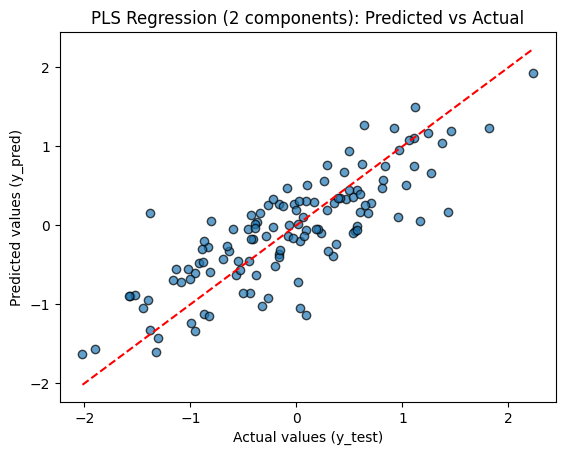

In [ ]:
import matplotlib.pyplot as plt
#predicting on the test set
y_pred = pls.predict(X_test)
#plotting predicted vs actual
plt.scatter(y_test, y_pred, edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # reference line y=x
plt.xlabel("Actual values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("PLS Regression (2 components): Predicted vs Actual")
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

R²: 0.673
Mean Squared Error: 0.217


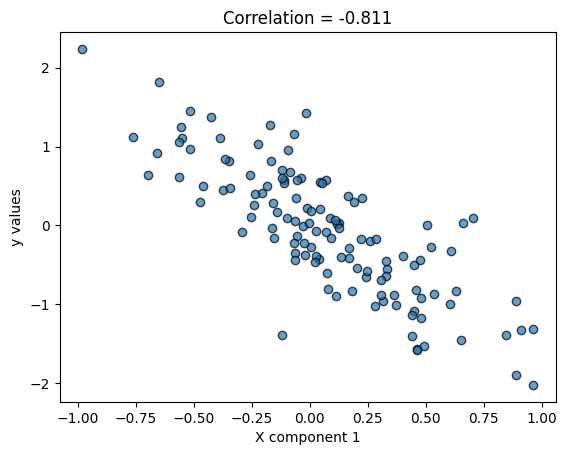

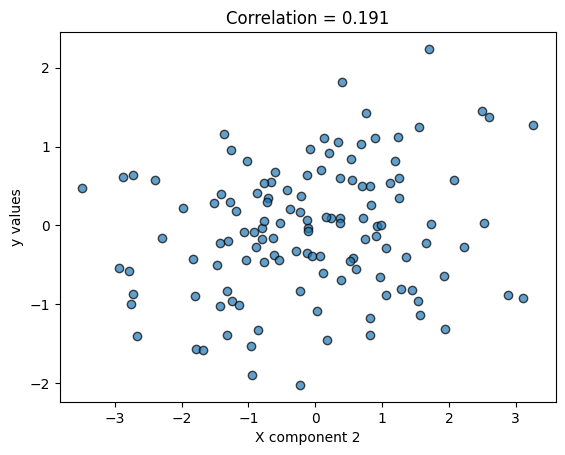

In [28]:
# Component 1
comp1 = pls.transform(X_test)[:, 0]
corr1 = np.corrcoef(comp1, y_test.ravel())[0, 1]
# np.corrcoef(...) computes a 2×2 correlation matrix between comp1 and y_test.
# y_test.ravel() flattens y_test into 1D so it matches comp1’s shape.

plt.scatter(comp1, y_test, edgecolor="k", alpha=0.7)
plt.xlabel("X component 1")
plt.ylabel("y values")
plt.title(f"Correlation = {corr1:.3f}")
plt.show()

# Component 2
comp2 = pls.transform(X_test)[:, 1]
corr2 = np.corrcoef(comp2, y_test.ravel())[0, 1]
plt.scatter(comp2, y_test, edgecolor="k", alpha=0.7)
plt.xlabel("X component 2")
plt.ylabel("y values")
plt.title(f"Correlation = {corr2:.3f}")
plt.show()

### d. Reflect
Finally, answer these questions:

- What do the learned PLS components represent in your dataset?
- Did increasing the number of components improve performance?
- What makes PLS different from PCA?

1. PLS components are a linear combination of features of the dataset that are most strongly correlated with the outcomes y. the learned PLS components are derived from PCA- PCA tells us which features are most correlated to y and the components build on this.

## 3. PLS on real data: Molecular Fingerprints and Permeability (50 points)

In this final part of the lab, you will apply PLS Regression to a real-world, high-dimensional dataset from pharmaceutical research.

The goal is to build a predictive model of compound permeability—a key property that determines a molecule’s ability to cross biological membranes such as the intestinal wall or the blood–brain barrier. Permeability is critical in drug development, as compounds that cannot reach their target tissues may ultimately fail despite promising initial results.

You will work with a dataset containing 165 compounds characterized by 1,107 binary molecular fingerprints, which indicate the presence or absence of specific chemical substructures. Your task is to use PLS to predict each compound's permeability and evaluate whether such a model could serve as a computational alternative to expensive, labor-intensive lab assays.

Here the link to the dataset: https://github.com/UVADS/DS-4021/blob/84e85842222820f6d60bfdfd051c6d1556d98479/datasets/lab01_data.csv

### a. Prepare data

- Load the dataset.
- Separate the molecular fingerprint variables (`X`) from the permeability values (`y`).
- Split the data into training and test sets (e.g., 70/30 split).

### b. Create a pipeline.

Create a pipeline that includes the following:

- A variance thresholding step to remove near-constant binary features, since molecular fingerprints are typically sparse.
(Hint: you may want to check the `feature_selection` module in `scikit-learn`.)
- A standardization step.
- The Partial Least Squares Regression method.

### c. Optimize and train.

After you create the pipeline, you should optimize (using cross-validation) and train your pipeline. Your optimization should tune the number of PLS components. After training, report:

- The number of predictors remaining after the variance thresholding step
- The selected number of PLS components
- The cross-validated **R²** on the training set.


### d. Evaluate

- Use the best PLS model to predict permeability on the test set
- Report the test set R²

### e. Compare.

- Compare with the performance obtained using a penalized principal component regression. You may experiment with Lasso, Ridge or/and ElasticNet. Make sure to encapsulate this model into a pipeline and optimize it as well.


### f. Reflect

Discuss:
- Which model performed best?
- Would you trust any of your models enough to replace the permeability lab assay?
- What would be the trade-offs of doing so?

In [ ]:
# YOUR ANSWERS FROM HERE (USE AS MANY CELLS AS NEEDED)

## 4. Collaboration Reflection (5 points)

As a group, briefly reflect on the following (max 1–2 short paragraphs):

- How did the group dynamics work throughout the assignment?
- Were there any major disagreements or diverging approaches?
- How did you resolve conflicts or make final modeling decisions?
- What did you learn from each other during this project?

YOUR TEXT HERE